# Homework 2 and 3

Homework 2 is due on Monday, February 3.<br>
Homework 3 is due on Monday, February 10.

## Written Part

**Problem 1:** Consider an $m\times n$ matrix $X$, an $m$-component vector $y$, and an $n$-component vector $\theta$. Suppose the matrix $X$ is tall and skinny, that is, suppose $m>n$. We saw in class the the gradient of the MSE cost function is proportional to $X^TX\theta-X^Ty = X^T(X\theta-y)$. This quantity can be computed two different ways: 

**Way 1:**
1. Compute the matrix product $X^TX$
2. Compute the matrix-vector product $(X^TX)\theta$
3. Compute the matrix-vector product $X^Ty$
4. Subtract the vector $X^Ty$ from the vector $(X^TX)\theta$

**Way 2:**
1. Compute the matrix-vector product $X\theta$
2. Subtract the vector $y$ from the vector $X\theta$
3. Compute the matrix-vector product $ X^T(X\theta-y)$

What would be the most efficient way in terms of operations (multiplications, additions, and subtractions) of computing it?



## Answer 1 ##
**Way 2** would be the more efficient way to solve the MSE because it only consists of 2 matrix-vector multiplications and 1 vector subtraction.


**Problem 2 (for M462 students):** Consider the function $f(x)=x^TMx$, where $x$ is a vector, and $M$ is an $n\times n$ matrix (possibly non-symmetric). Find the gradient of $f(x)$.  

$$
\dfrac{\partial f}{\partial x_i} 
= [0\cdots010\cdots0]Mx + x^TM
\begin{bmatrix}
0 \\ 
\vdots \\ 
0 \\ 
1 \\ 
0 \\ 
\vdots \\ 
0 
\end{bmatrix}$$


$$
\dfrac{\partial f}{\partial x_i} 
= [\text{row i of M}]x + x^T
\begin{bmatrix}
\text{col} \\
i \\
\text{of} \\ 
M \\
\end{bmatrix}
$$

$$
\dfrac{\partial f}{\partial x_i} 
= Mx + M^Tx
$$

**Problem 2 (for M562 students):** Consider two convex functions $f(x)$ and $g(x)$. Assume $g(x)$ is non-decresing. Show that the composite function $h(x)=g(f(x))$ is also convex.

**Problem 3:** Consider the MSE cost function $\mbox{MSE}(\theta)=\|y-X\theta\|_2^2$. Find the second-order partial derivatives matrix (the *Hessian matrix*)

$$
\begin{bmatrix}
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1^2} &
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1\partial \theta_2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1\partial\theta_n} \\
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2\partial \theta_1} & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2^2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2\partial\theta_n} \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_n\partial \theta_1} & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_n\partial \theta_2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial\theta_n^2}
\end{bmatrix}
$$

$$
\dfrac{2}{m}(X^T(X\theta_i - y)(X\theta_j - y)) $$

$$
\begin{bmatrix}
\dfrac{2}{m}(X^T(X\theta_1 - y)(X\theta_1 - y)) &
\dfrac{2}{m}(X^T(X\theta_1 - y)(X\theta_2- y)) & \cdots & 
\dfrac{2}{m}(X^T(X\theta_1 - y)(X\theta_n - y)) \\
\dfrac{2}{m}(X^T(X\theta_2 - y)(X\theta_1 - y))  & 
\dfrac{2}{m}(X^T(X\theta_2 - y)(X\theta_2 - y)) & \cdots &
\dfrac{2}{m}(X^T(X\theta_2 - y)(X\theta_n - y)) \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{2}{m}(X^T(X\theta_n - y)(X\theta_1 - y)) & 
\dfrac{2}{m}(X^T(X\theta_n - y)(X\theta_2 - y)) & \cdots & 
\dfrac{2}{m}(X^T(X\theta_n - y)(X\theta_n - y)) 
\end{bmatrix}
$$

$$
= 2(X^TX)_{iJ}
$$

## Programming Part

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### The Iris Dataset

The *iris* dataset contains a bunch of measurements for 150 flowers representing three species of iris (setosa, versicolor and virginica).
For each flower, we have its petal length, petal width, sepal length, and sepal width, as well as its species.

In [2]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/iris.data'
iris_data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','species'])
iris_data.head(5) #first 5 rows


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let us look at the scatterplots for each of the six pairs of measurements.

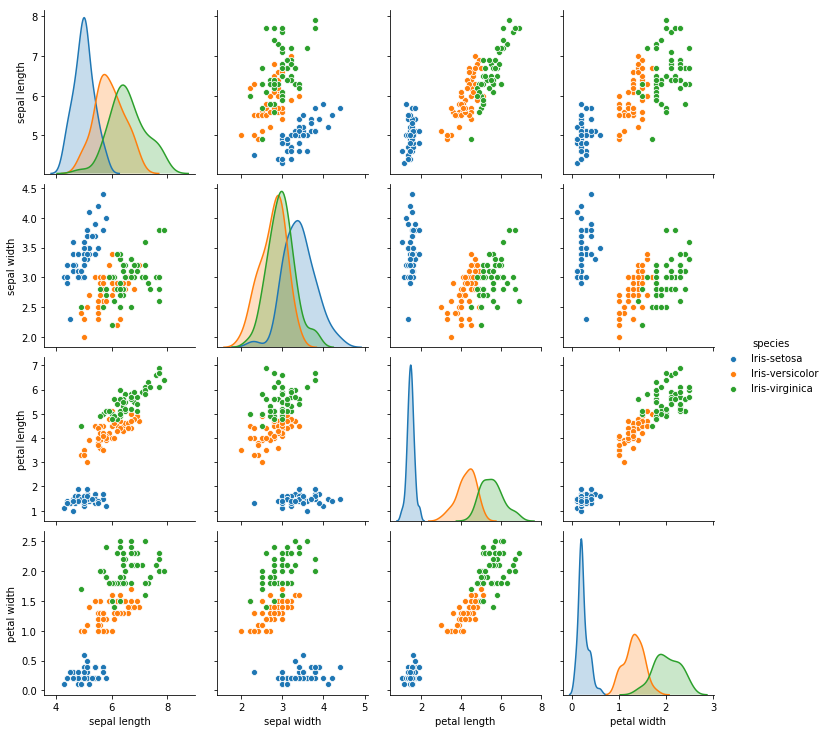

In [3]:
sns.pairplot(data=iris_data,hue='species')

### Assignments

**Part 1:** Add to the iris_data dataframe a new column called *target*. For each flower, set

$$
\mbox{target} = \left\{ \begin{array}{cc} 
1 & \mbox{ if species }=\mbox{ setosa},\\
0 & \mbox{ if species }\neq \mbox{ setosa}.
\end{array}\right.
$$

Hint: the easiest way to do is by using pandas.Series.map (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)

In [4]:
rule = {'Iris-setosa':1, 'Iris-versicolor':0, 'Iris-virginica':0}
iris_data['target'] = iris_data['species'].map(rule)
iris_data

,sepal length,sepal width,petal length,petal width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


**Part 2:** Use Gradient Descent to train a linear model for predicting the target values.

Gradient descenmt is used after part 3.

In [5]:
y = iris_data['target'].to_numpy()
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = iris_data[features].to_numpy()
x = iris_data.iloc[:,0:4]
x.head(5)
X = np.c_[np.ones(len(x)),x]


**Part 3:** Write a function for predicting whether the species of an iris flower is setosa or non-setosa. Your function must use the linear model from part 2 and follow the classification rule:
1. if the predicted target value is larger than or equal to 0.5, then the species is setosa.
2. if the predicted target value is less than 0.5, then the species is not setosa.

How many non-setosa iris flowers are correctly classified as non-setosa?

100.

How many non-setosa iris flowers are misclassified as setosa?

0.



In [6]:
def check_predicted(X,theta, y, setToLow, setToHigh, cutOff):
    y_pre = X@theta
    y_pre_post = y_pre.copy()
    y_a = 0 
    y_b = 0
    for i in range(len(y_pre)):
        if y_pre[i][0] >= cutOff:
            y_pre_post[i][0] = setToHigh
        elif y_pre[i][0] < cutOff:
            y_pre_post[i][0] = setToLow
        if y_pre_post[i][0] == y[i]:
            if y[i] == 0:
                y_b = y_b + 1
            if y[i] == 1:
                y_a = y_a + 1
    return [y_pre, y_pre_post, str(y_a) + " were correctly 1\n" + str(y_b) + " were correctly 0\n" + str((y_a + y_b) / len(y) * 100) + "% were correct "]

## Gradient Descent ##

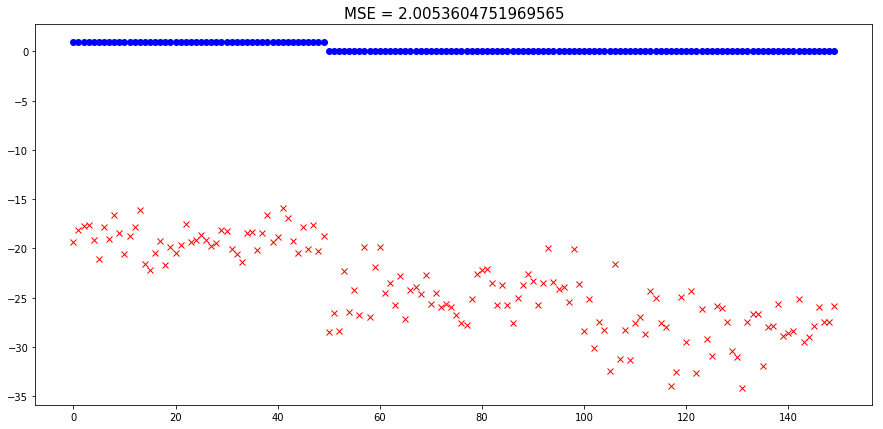

In [26]:
s = 0.01 #learning rate

'Initialization'
theta = np.random.randn(5,1)
y.shape = (150,1)

"MSE"
m = len(y)
MSE = np.linalg.norm(X@theta-y)/m

# plot predicted with random theta
plt.figure(figsize=(15,7))
plt.plot(y,'bo')

y_pre = X@theta
plt.plot(y_pre,'rx')
plt.title('MSE = '+str(MSE),fontsize=15)

i = 0 # for the number of interation

In [31]:
'Gradient Descent Step'
while i < 3000: # number of iterations
    gradient = (2/m)*X.T@(X@theta-y)
    theta = theta - s*gradient
    i = i+1

"MSE"
MSE = np.linalg.norm(X@theta-y)/m

50 were correctly 1
100 were correctly 0
100.0% were correct 


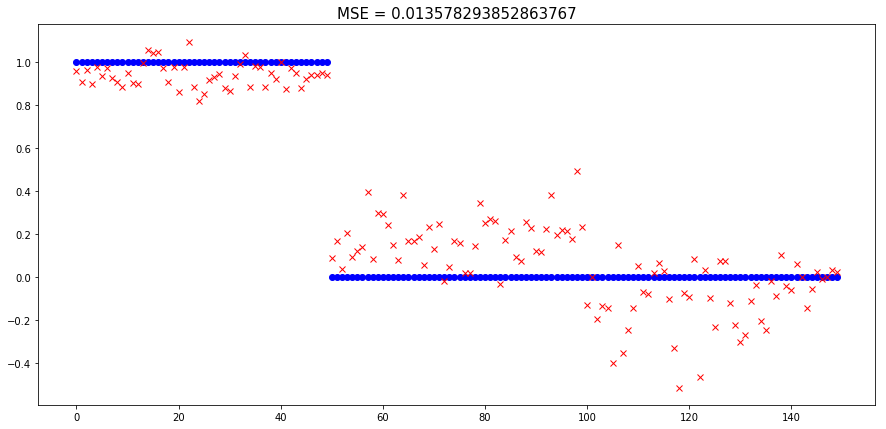

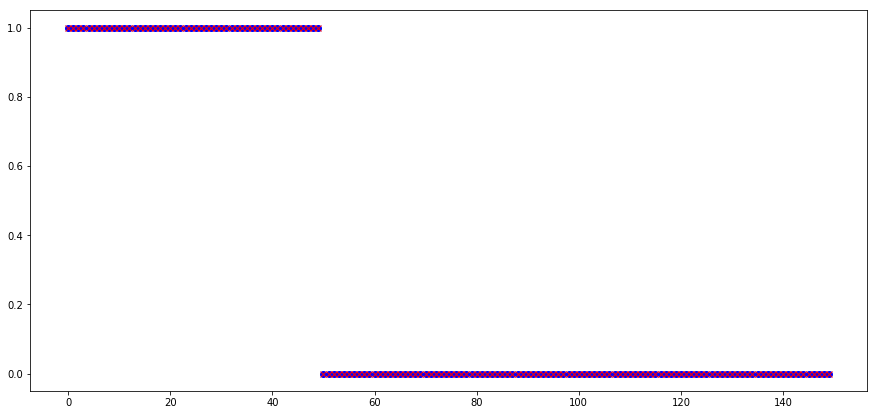

In [32]:
ret = check_predicted(X,theta, y, 0, 1, 0.5)

print(ret[2])

plt.figure(figsize=(15,7))
plt.plot(y,'bo')
plt.plot(ret[0],'rx')
plt.title('MSE = '+str(MSE),fontsize=15)

plt.figure(figsize=(15,7))
plt.plot(y,'bo')
plt.plot(ret[1],'rx')



## Stochastic Gradient Descent ##

50 were correctly 1
0 were correctly 0
33.33333333333333% were correct 


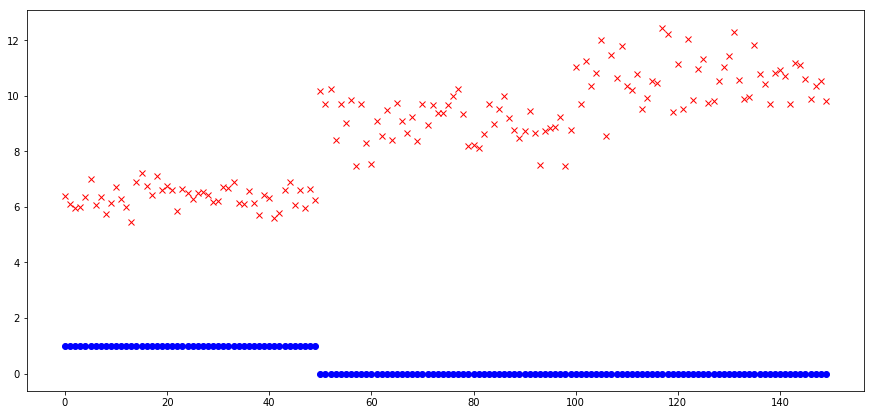

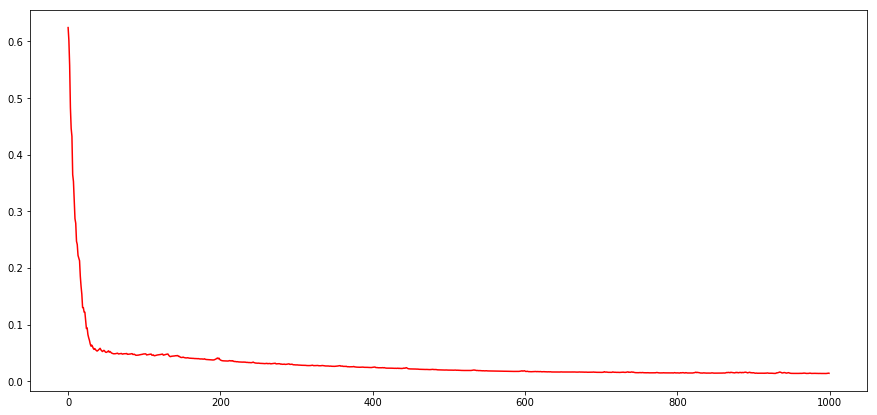

In [11]:
'Stochastic Gradient Descent (SGD)'
m = 150
n_iterations = 1000 #number of SGD steps
theta = np.random.rand(5,1) #random initialization
MSE = np.zeros((n_iterations,1)) #we will compute the MSE function after each SGD step
s = 0.1 #learning rate

ret = check_predicted(X,theta, y, 0, 1, 0.5)

print(ret[2])

plt.figure(figsize=(15,7))
plt.plot(y,'bo')
plt.plot(ret[0],'rx')


for i in range(n_iterations):
    random_row = np.random.randint(m) #pick a random integer in [0,m-1]
    xi = X[None,random_row] #keep xi as a row vector
    yi = y[random_row]
    gradient = (2/m)*xi.T@(xi@theta-yi)
    theta = theta - s*gradient
    MSE[i] = np.linalg.norm(y-X@theta)/m

plt.figure(figsize=(15,7))    
plt.plot(MSE,'r-')

50 were correctly 1
100 were correctly 0
100.0% were correct 


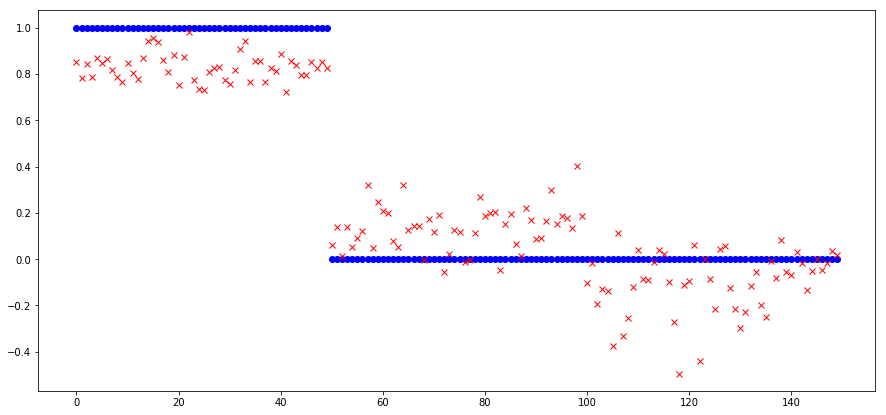

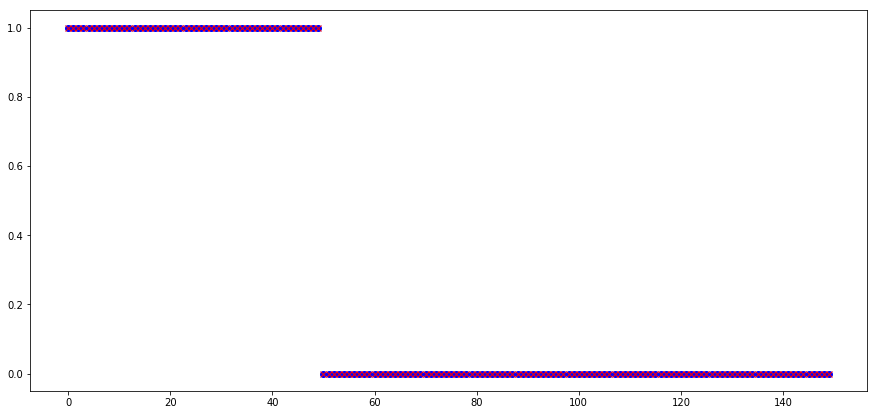

In [12]:
ret = check_predicted(X,theta, y, 0, 1, 0.5)

print(ret[2])

plt.figure(figsize=(15,7))
plt.plot(y,'bo')
plt.plot(ret[0],'rx')

plt.figure(figsize=(15,7))
plt.plot(y,'bo')
plt.plot(ret[1],'rx')
